# Dependency usage

This notebook shows the distribution of dependencies by version

_Note: If you have opened this notebook from Moderne, the data table is already loaded locally as `./dependency-usage-violin.xlsx`._

In [104]:
data_table_file = "./dependency-usage-violin.xlsx"

In [ ]:
import piplite

await piplite.install('pandas')
await piplite.install('openpyxl')
await piplite.install('matplotlib')
await piplite.install('seaborn')
await piplite.install('code_data_science')

In [105]:
import pandas as pd
import warnings
warnings.simplefilter("ignore")

In [ ]:
df = pd.read_excel(data_table_file,engine="openpyxl")

In [106]:
df = df[['artifactId', 'version', 'depth']]
#df['version'] = list(map(lambda v: ".".join(v.split(".")[0:2]), df['version']))
print(df.head())

                artifactId version  depth
0         jackson-databind  2.14.1      0
1             jackson-core  2.14.1      0
2      jackson-annotations  2.14.1      5
3  jackson-datatype-jsr310  2.14.1      0
4         jackson-databind  2.11.4      1


In [107]:
from code_data_science.index_versions import index_versions
vmap = index_versions(df.version)
df['nVersion'] = list(map(lambda v: vmap[v], df.version))

def index_ga(groupartifacts):
    sorted_ga = sorted(list(set(groupartifacts)))
    return { ga : sorted_ga.index(ga) for ga in sorted_ga }
gmap = index_ga(df.artifactId)
df['nArtifactId'] = list(map(lambda g: gmap[g], df.artifactId))

df = df.sort_values(by=['nVersion', 'nArtifactId'])
print(df.head())

           artifactId version  depth  nVersion  nArtifactId
105  jackson-databind   2.6.6      1         0            2
109  jackson-databind   2.6.6      1         0            2
113  jackson-databind   2.6.6      0         0            2
178  jackson-databind   2.6.6      1         0            2
183  jackson-databind   2.6.6      1         0            2


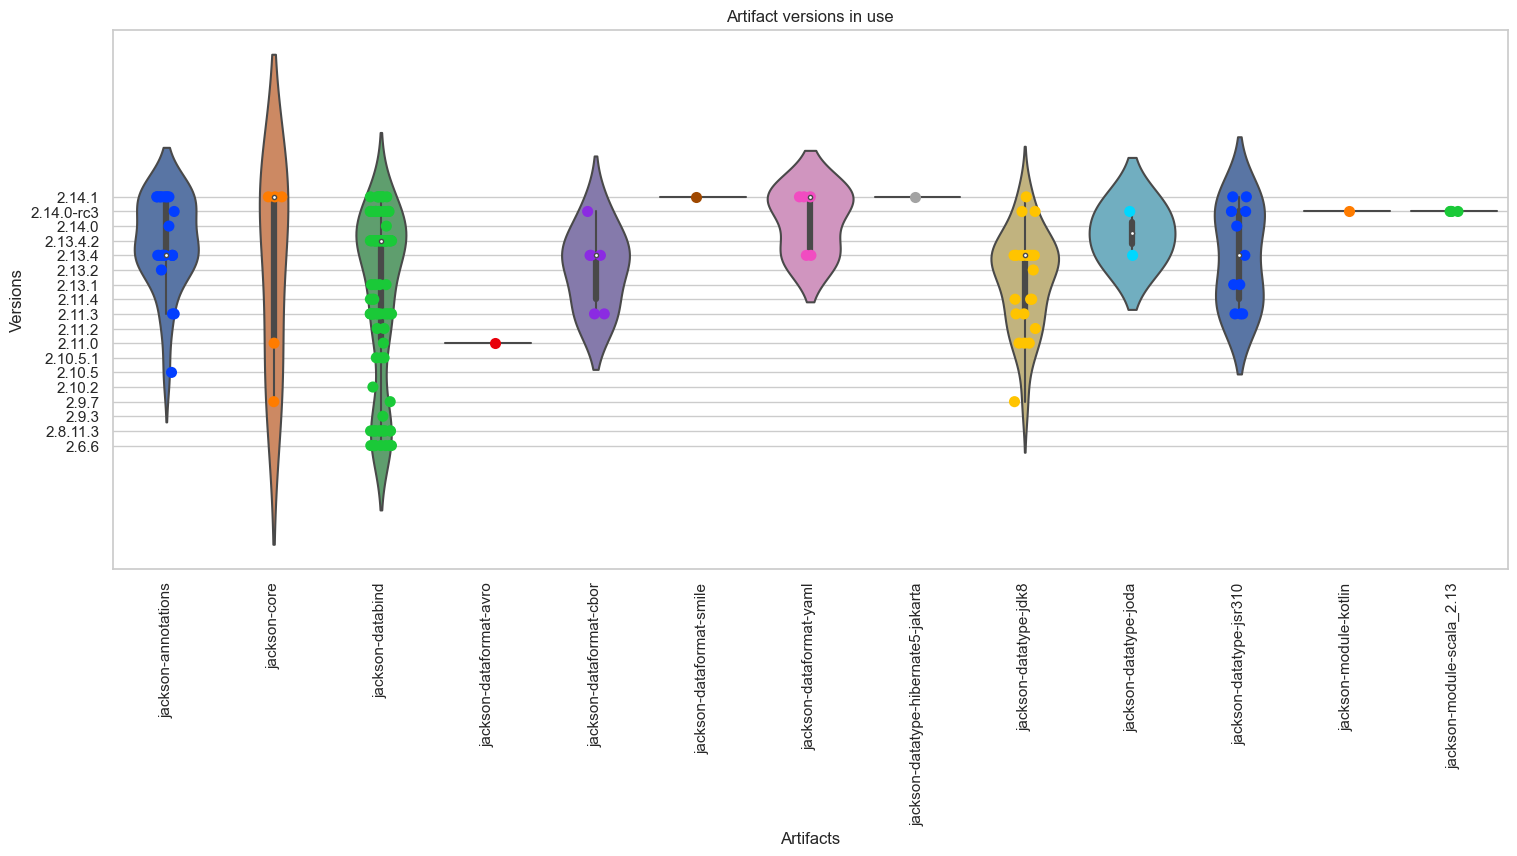

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(context="notebook")
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(18,7))

sns.stripplot(x="nArtifactId", y="nVersion", data=df, size=8, ax=ax, palette="bright")
sns.violinplot(x="nArtifactId", y="nVersion", data=df, size=8, ax=ax, palette="deep")

ax.yaxis.set_ticks(list(vmap.values()), labels=list(vmap.keys()))
ax.xaxis.set_ticks(list(gmap.values()), labels=list(gmap.keys()))
ax.set_yticklabels(labels=list(vmap.keys()))
ax.set_xticklabels(labels=list(gmap.keys()), rotation=90)
ax.set_xlabel("Artifacts")
ax.set_ylabel("Versions")
ax.set_title("Artifact versions in use")
plt.show()

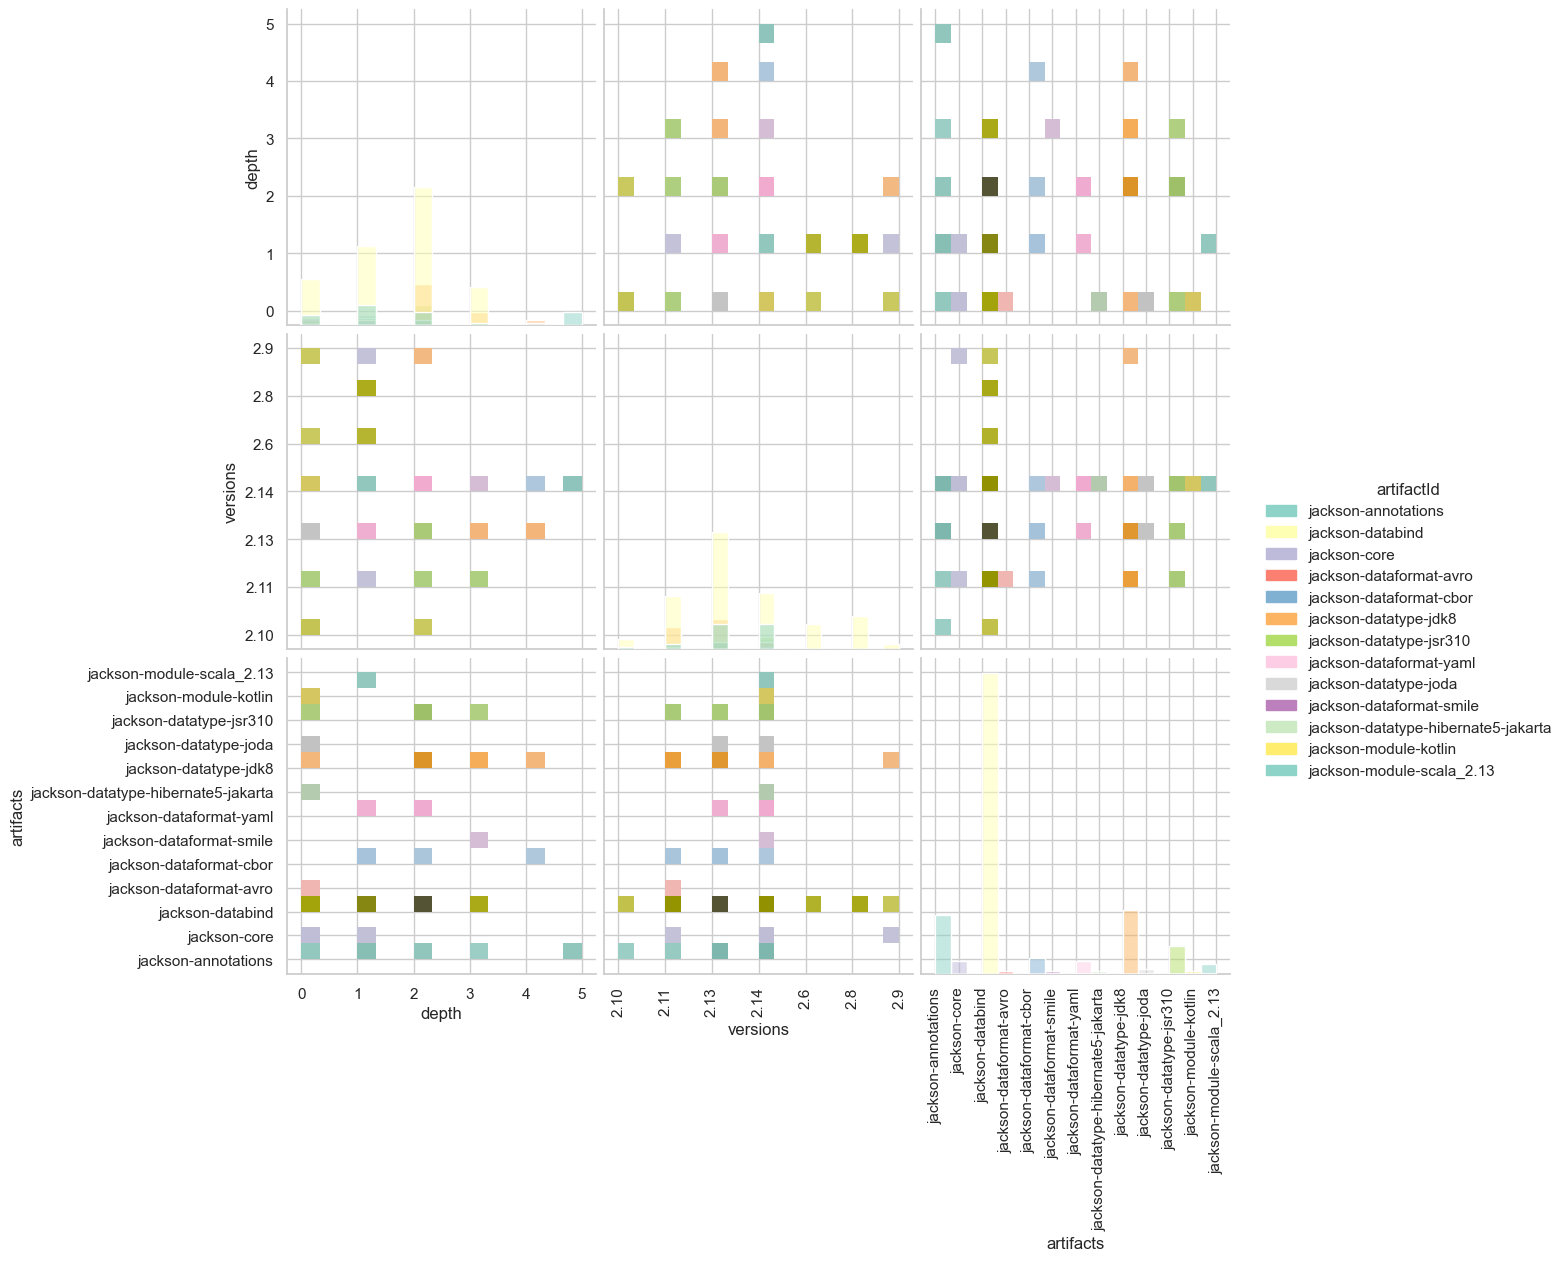

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(context="notebook")
sns.set_style("whitegrid")
# fig, ax = plt.subplots(figsize=(18,7))

g = sns.pairplot(df, height=3.5, hue="artifactId", palette="Set3", kind="hist")

for ax in g.axes.flatten():
    if ax.get_ylabel() == "nVersion":
        ax.yaxis.set_ticks(list(vmap.values()), labels=list(vmap.keys()))
        ax.set_yticklabels(labels=list(vmap.keys()))
        ax.set_ylabel("versions")
    if ax.get_ylabel() == "nArtifactId":
        ax.yaxis.set_ticks(list(gmap.values()), labels=list(gmap.keys()))
        ax.set_yticklabels(labels=list(gmap.keys()))
        ax.set_ylabel("artifacts")
    if ax.get_xlabel() == "nVersion":
        ax.xaxis.set_ticks(list(vmap.values()), labels=list(vmap.keys()))
        ax.set_xticklabels(labels=list(vmap.keys()), rotation=90)
        ax.set_xlabel("versions")
    if ax.get_xlabel() == "nArtifactId":
        ax.xaxis.set_ticks(list(gmap.values()), labels=list(gmap.keys()))
        ax.set_xticklabels(labels=list(gmap.keys()), rotation=90)
        ax.set_xlabel("artifacts")

plt.show()

In [70]:
df_no_artifact = df[['version','depth', 'nVersion']]
print(df_no_artifact.head())

     version  depth  nVersion
1074   2.1.0      0         0
1076   2.1.0      0         0
1070   2.1.1      1         1
757    2.1.4      2         2
763    2.1.4      3         2


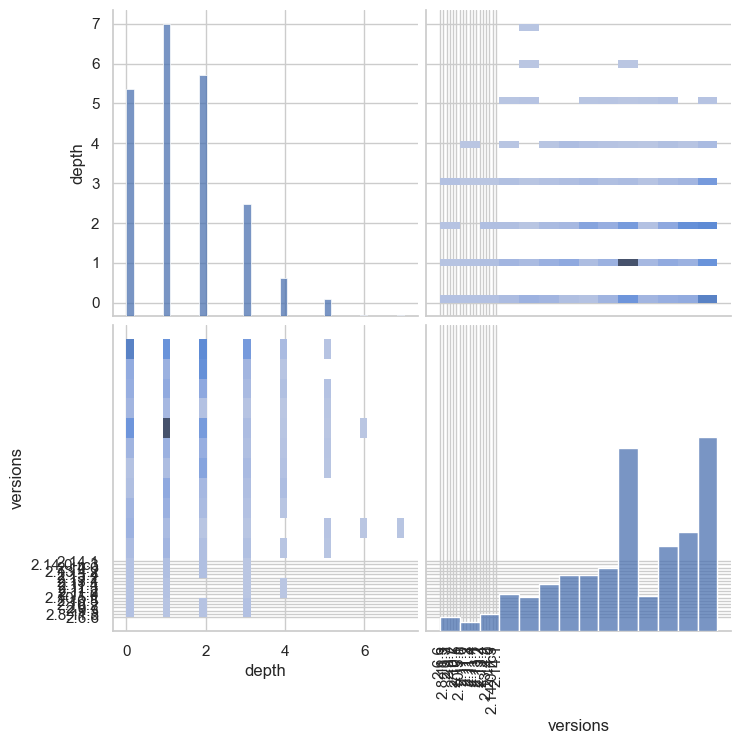

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(context="notebook")
sns.set_style("whitegrid")

g = sns.pairplot(df_no_artifact, height=3.5, palette="Blues", kind="hist")

for ax in g.axes.flatten():
    if ax.get_ylabel() == "nVersion":
        ax.yaxis.set_ticks(list(vmap.values()), labels=list(vmap.keys()))
        ax.set_yticklabels(labels=list(vmap.keys()))
        ax.set_ylabel("versions")
    if ax.get_xlabel() == "nVersion":
        ax.xaxis.set_ticks(list(vmap.values()), labels=list(vmap.keys()))
        ax.set_xticklabels(labels=list(vmap.keys()), rotation=90)
        ax.set_xlabel("versions")

plt.show()